In [1]:
import matplotlib.pyplot as plt
from elorating import *

In [2]:
from database import Database, LoadDatabase
import numpy as np

In [3]:
db = LoadDatabase()
sortedStandings = [(k,v) for k,v in sorted(db.standings.items(),
                   key=lambda x: db.contests.loc[x[0]].startTime)]

In [4]:
consider = 50

In [5]:
ans, userRatings = EloRatingSystem(db, consider=consider, verbose=True)

Standings left: 50 contestId: 26
Standings left: 49 contestId: 27
Standings left: 48 contestId: 28
Standings left: 47 contestId: 29
Standings left: 46 contestId: 30
Standings left: 45 contestId: 31
Standings left: 44 contestId: 32
Standings left: 43 contestId: 33
Standings left: 42 contestId: 34
Standings left: 41 contestId: 35
Standings left: 40 contestId: 36
Standings left: 39 contestId: 37
Standings left: 38 contestId: 40
Standings left: 37 contestId: 41
Standings left: 36 contestId: 42
Standings left: 35 contestId: 43
Standings left: 34 contestId: 47
Standings left: 33 contestId: 49
Standings left: 32 contestId: 51
Standings left: 31 contestId: 53
Standings left: 30 contestId: 54
Standings left: 29 contestId: 55
Standings left: 28 contestId: 56
Standings left: 27 contestId: 57
Standings left: 26 contestId: 58
Standings left: 25 contestId: 59
Standings left: 24 contestId: 60
Standings left: 23 contestId: 61
Standings left: 22 contestId: 62
Standings left: 21 contestId: 63
Standings 

In [6]:
print(userRatings['mohammadkotb'].ratings)

[1212.5984251968505, 1203.366135833116, 1201.625289909676, 1209.4511046230814, 1194.928831889832, 1176.8111954547217, 1181.6817210863474]


In [7]:
def getPlaces(handle):
    ans = []
    for contestId, standings in sortedStandings[:consider]:
        if handle in standings.index:
            ans.append(standings.loc[handle]["rank"])
    return ans

def getRatings(handle):
    ans = []
    for contestId, standings in sortedStandings[:consider]:
        if handle in standings.index:
            ans.append(standings.loc[handle]["oldRating"])
    return ans

def getRandomUser():
    return np.random.choice([handle for handle, r in userRatings.items()])

def compareSystems(handle):
    eloRatings = userRatings[handle].ratings
    cfRatings = getRatings(handle)
    print("number of contests", len(cfRatings))
    assert len(eloRatings) == len(cfRatings)
    xs = np.arange(len(eloRatings))

    plt.figure(figsize=(15, 8))
    plt.plot(xs, eloRatings, label="EloRatings")
    plt.plot(xs, cfRatings, label="CodeForces")
    plt.title(handle)
    plt.legend()
    plt.show()

SergeiFedorov
number of contests 5


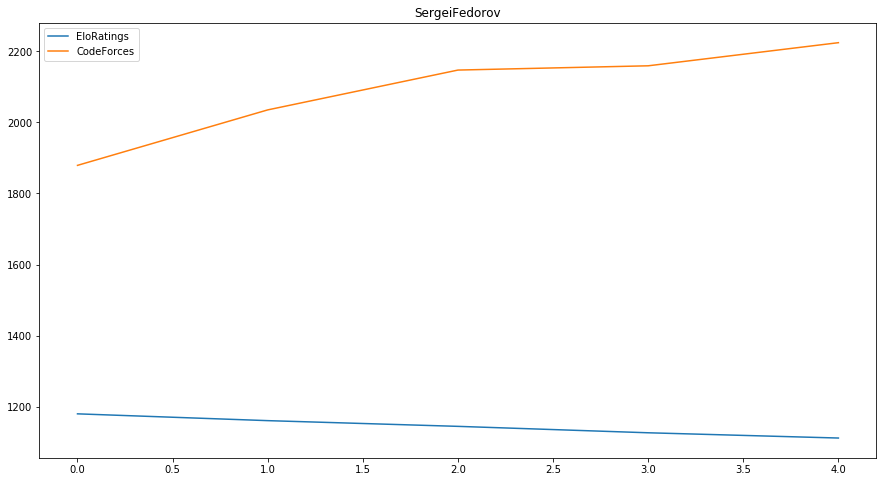

In [10]:
handle = getRandomUser()
print(handle)
compareSystems(handle)

number of contests 1


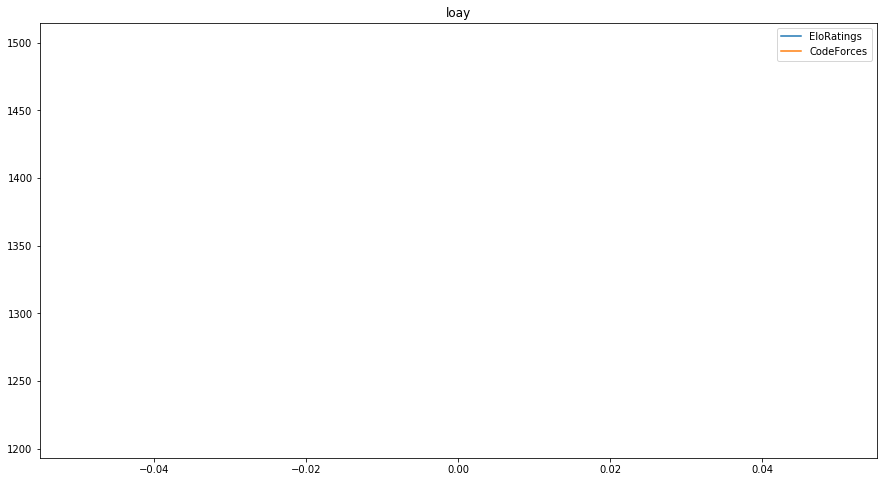

In [9]:
handle = getRandomUser()
compareSystems(handle)